In [39]:
#@title Package
#!pip install GAparsimony

In [40]:
#!pip install -Uqq ipdb
#import ipdb
#!pip install sweetviz

In [1]:
#@title Library
import os

import numpy as np
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
import matplotlib.animation as animation
import seaborn as sns
from scipy.stats import pearsonr
#import phik
#from phik.report import plot_correlation_matrix
import sweetviz as sw
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [42]:
#@title Parameters
EXEL_HEADER = ['Number',
               'Institution',
               'Patient',
               'Gender',
               'Birthday',
               'Diagnosis',
               'Cardiovascular',
               'Drug',
               'Dose',
               'INR_Date',
               'INR',
               'PTI']
AGE_COUNT = 4
FEATURES = [
#            'Institution',
            'ID_Patient',
            'Sample',
            'Age',
            'Prev_Dose',
            'prev_INR',
            'date_diff',
            'Target_INR',
            'INR',
            'Dose']
FEATURES_DROP = ['Название файла',
                 '№',
 #                'Institution',
                 'Ф.И.О. пациента',
                 'Birthday',
 #                'Analyse_date',
                 'Год анализа',
 #                'Diagnosis',
                 'Диагноз для НС',
 #                'Сердечно -сосудистые события',
                 'CCC',
                 'Дата ССС', 'Давность ССС (лет) на момент приема врача',
                 'Наименование препарата',
                 'Доза',
                 'Дата последнего анализа',
                 'МНО от РКБ','МНО_predict',
                 'ПТИ от РКБ', 'ПТИ']


In [43]:
#pd.set_option('display.width', 200)
#pd.set_option('display.max_colwidth',10)
PATH = '/content/drive/MyDrive/Warfarin/'
SRCPATH = PATH+'SRC/'
df_all = pd.DataFrame(columns=EXEL_HEADER)
for fname in os.listdir(SRCPATH):
  print(f'Filename:{fname}')
  df = pd.read_excel(SRCPATH+fname,header=None,skiprows=5,names=EXEL_HEADER,index_col=None)
  hindex = 8
  df[EXEL_HEADER[:hindex]] = df[EXEL_HEADER[:hindex]].fillna(method = 'ffill')
#  print(f'Размер{df.shape}')
  df_all = df_all.append(df)
  del df
df_all = df_all[df_all['INR'].notna() & df_all['Dose'].notna()]
df_all.reset_index(inplace=True)
df_all = df_all[df_all.Drug.str.contains('варфарин',flags=re.IGNORECASE, regex=True)]
#print(df_all.shape)
#print(df_all.info())
df_all.to_excel(PATH+'Warfarin_total_src.xlsx',index=False)

Filename:ЦАТ_KMRT.xlsx
Filename:Чишминская ЦРБ.xlsx
Filename:ЦАТ_BUZD.xlsx
Filename:ЦАТ_STR.xlsx
Filename:ЦАТ_OKT.xlsx
Filename:ЦАТ_GKB5.xlsx
Filename:ЦАТ_SIB.xlsx
Filename:ЦАТ_NEFT.xlsx


378 <class 'list'>
       1 таб : 1
       1таб: 1
      1 таб : 3
      1,5 таб: 3
  1т: 1
 1 таб: 2
 1 табл + 1/4 табл: 1
 1+1\4: 15
 1,25 таб: 4
 1,5 таб: 2
 1,5таб: 1
 1/2 т: 5
 1\2 т: 4
 1\2т: 7
 1т: 66
 1т : 8
 1т+1/4т: 3
 1т+1\2т: 1
 1т+1\4 : 2
 1т+1\4т: 28
 2,5 мг по1 + 3/4 таблетки 1 раз в день: 3
 2,5 таб: 2
 2т: 13
 3 таб: 2
- 1/2 табл.: 4
- 1/4 табл.: 8
0,5 таб: 4
0,75 таб: 1
0,75т: 3
0,75таб: 3
0.75: 0
1: 0
1 ,5мг: 1
1 ,5таб: 2
1 ТАБ: 1
1 таб: 89
1 таб : 28
1 таб + 1/2  таб: 1
1 таб +1/2 таб : 4
1 таб 1/4 таб: 1
1 таб.: 1
1 табл: 14
1 табл + 1/4 табл: 11
1 табл +1/2 табл23.11.2022: 1
1 табл.: 136
1 табл. : 1
1 табл. +1/2  табл: 3
1 табл. +1/4 табл.: 2
1 табл. +1\4 табл: 3
1 табл. +3\4 табл: 8
1 табл.+1/2 таб : 12
1 табл.+1/2 табл: 6
1 табл.+1/2таб: 24
1 табл.+1/4 таб: 6
1 табл.+1/4 таб : 22
1 табл.+1/4 табл.: 11
1 табл.+1/4таб: 10
1 табл.+3/4 таб: 2
1 табл.+3/4 таб : 3
1 табл.+3/4 табл: 3
1 табл.+3/4таб: 2
1 табл.+3\4 табл.: 1
1+1/2 таб: 2
1+1/4: 6
1+1/4 таб: 21
1+1/4т и 1

                                             |          | [  0%]   00:00 -> (? left)


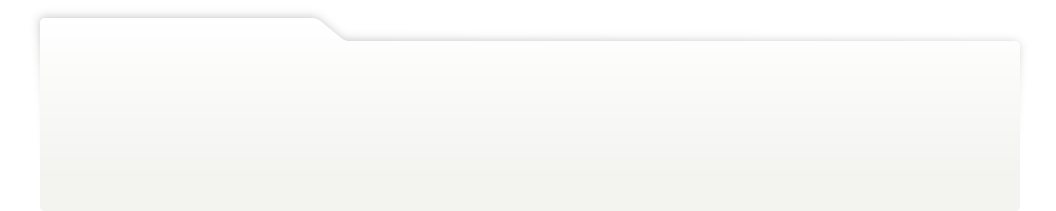
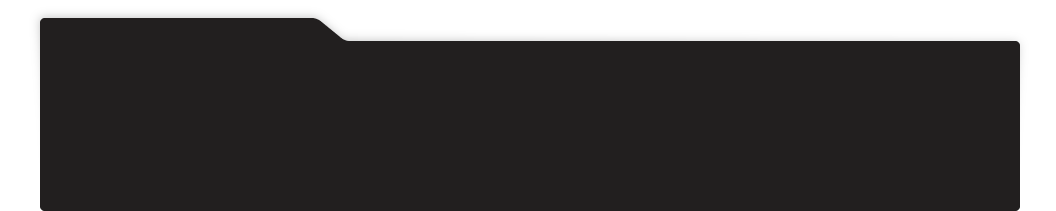
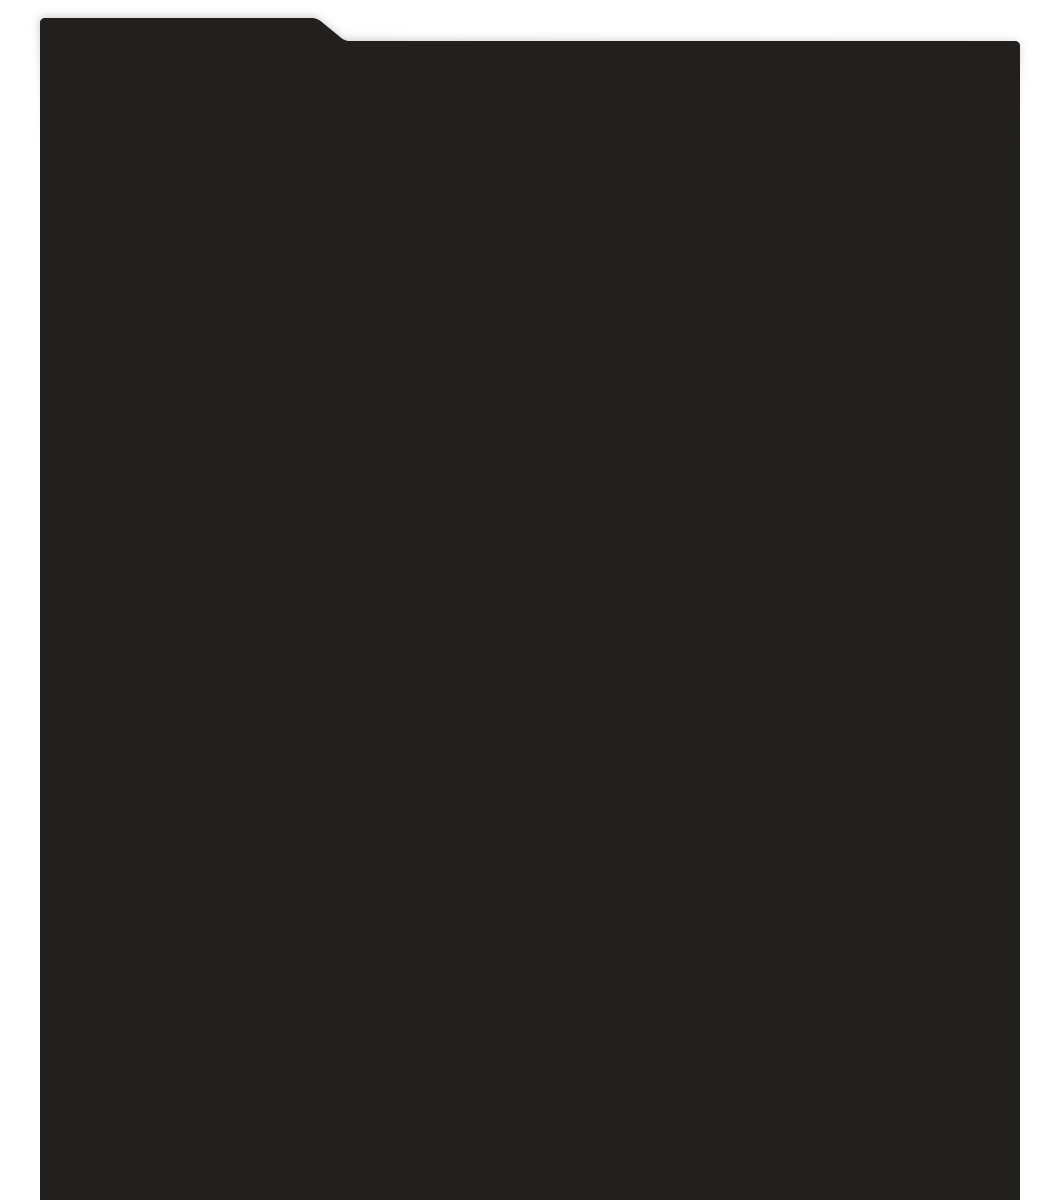
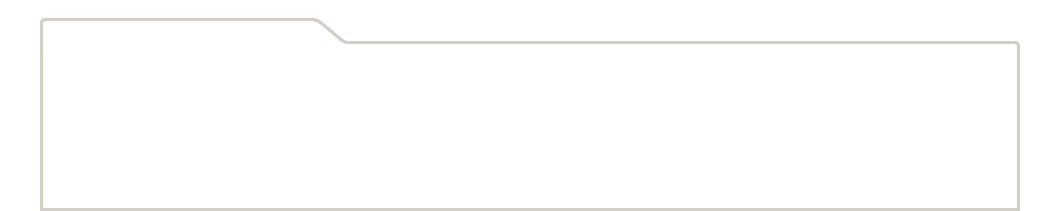
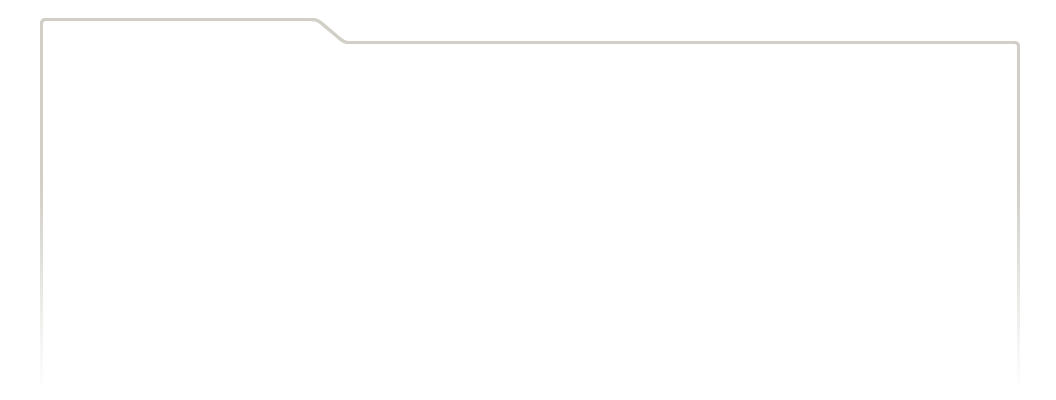
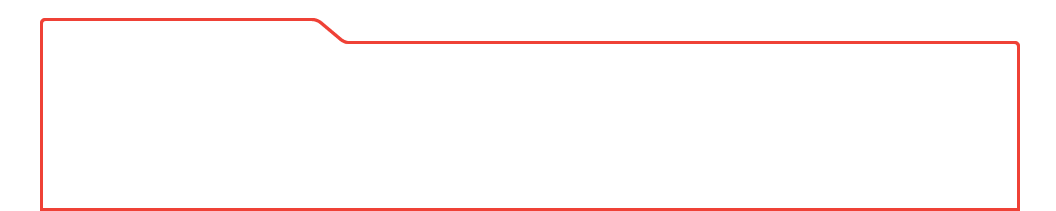
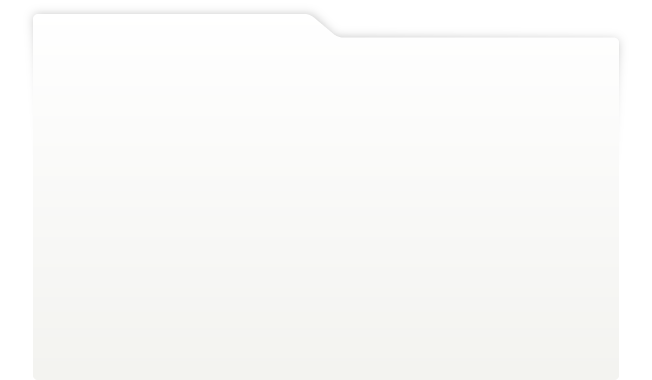
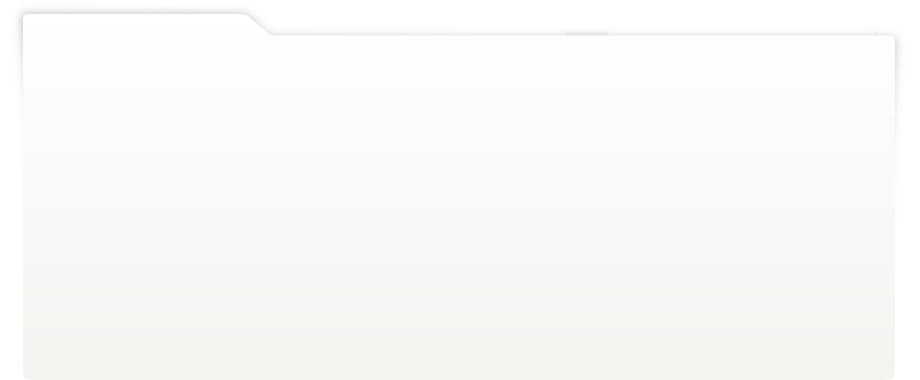
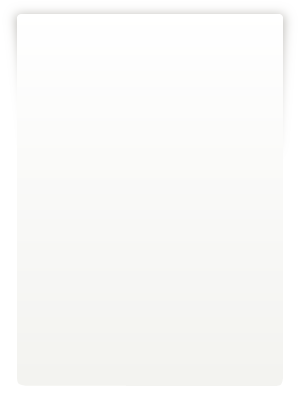
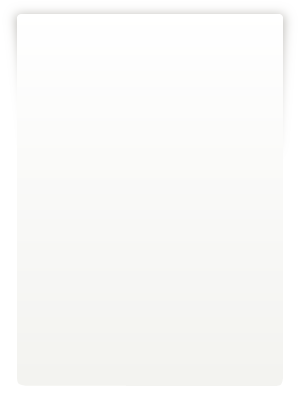
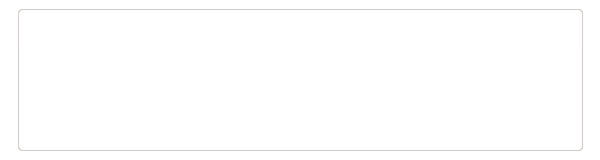
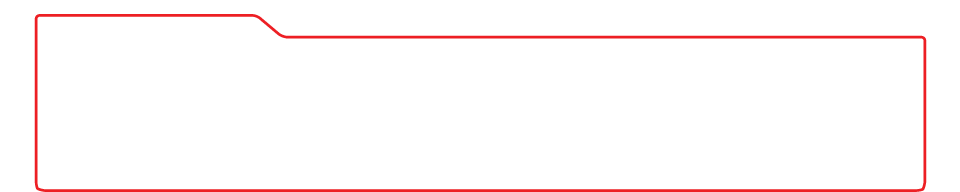
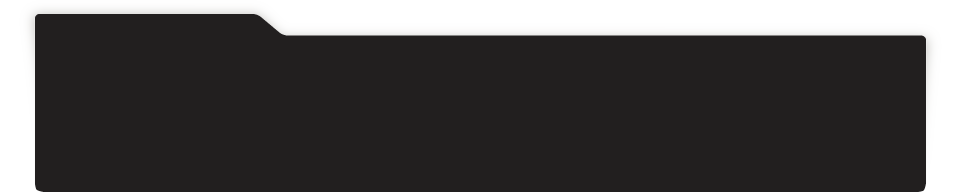
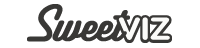
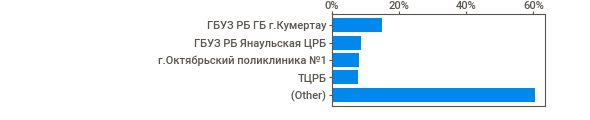
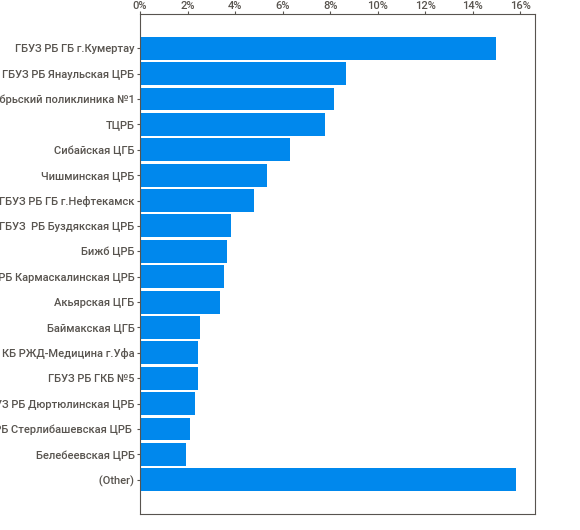
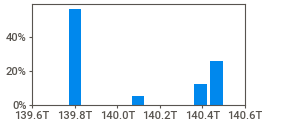
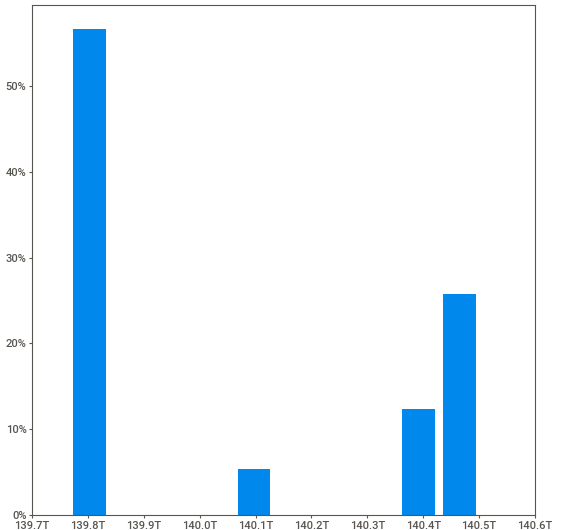
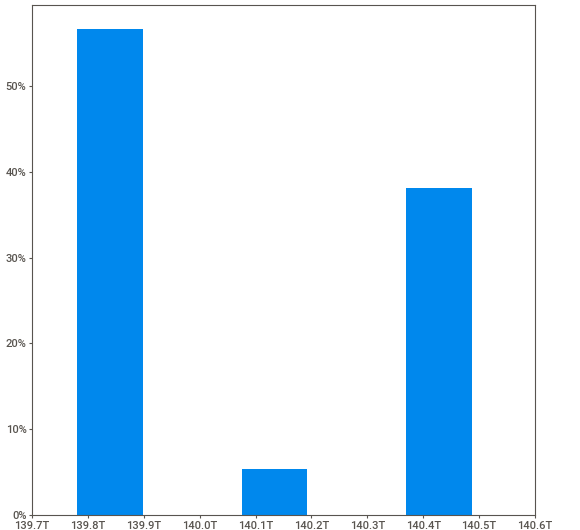
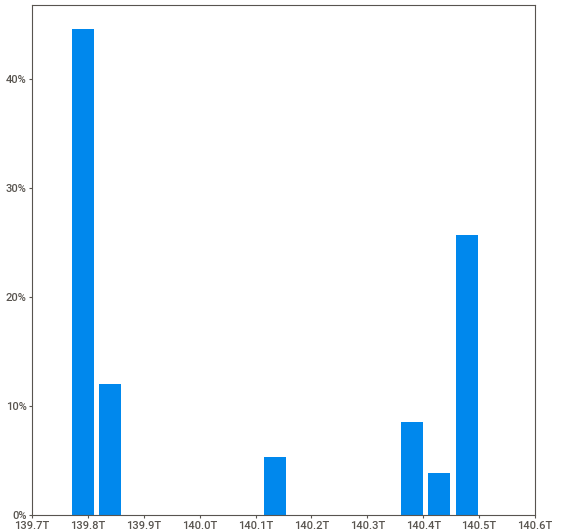
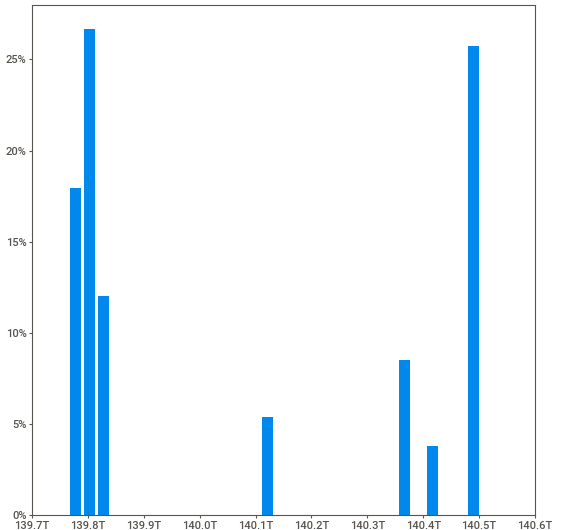
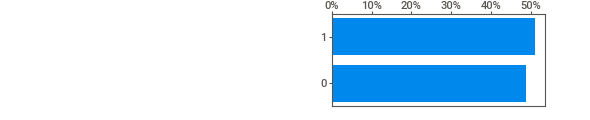
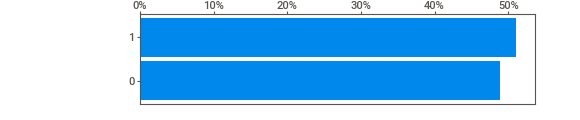
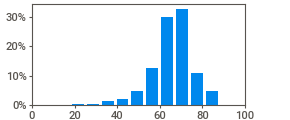
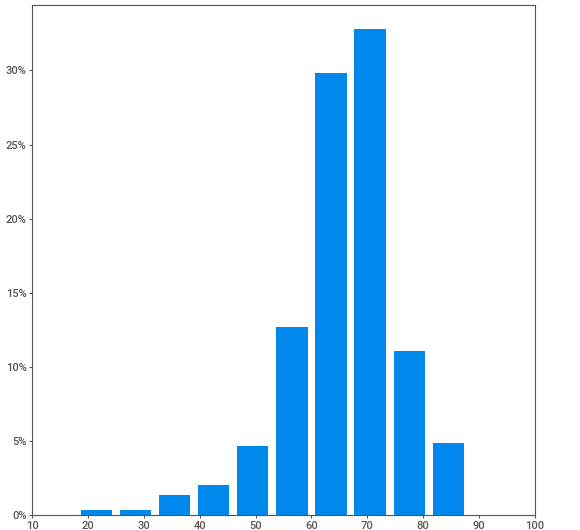
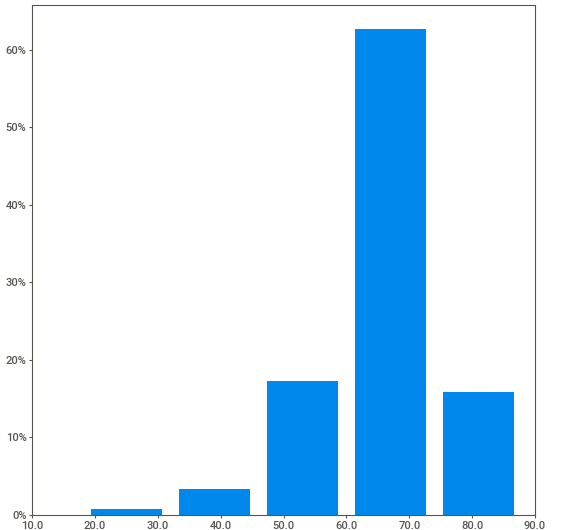
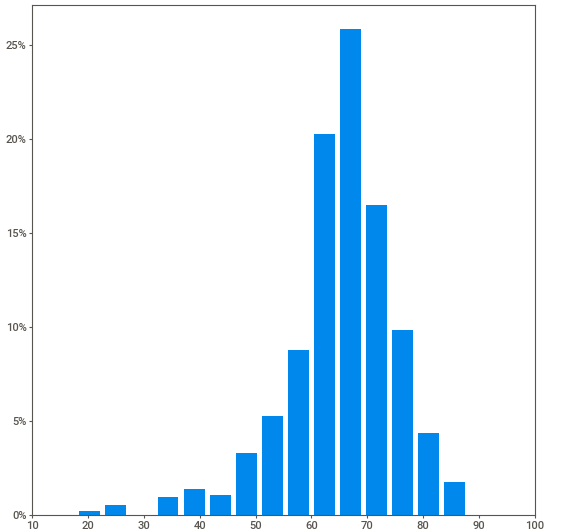
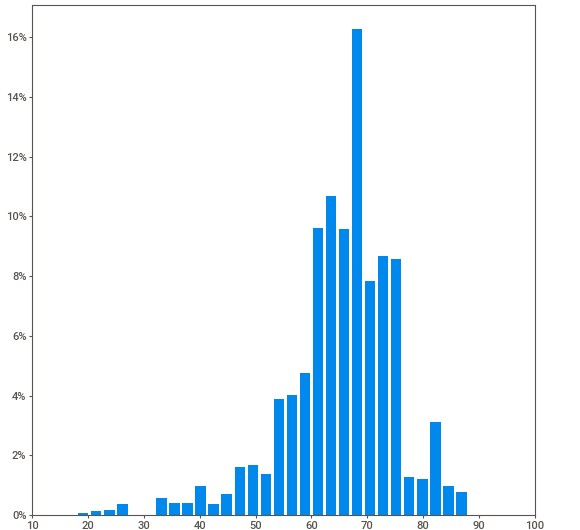
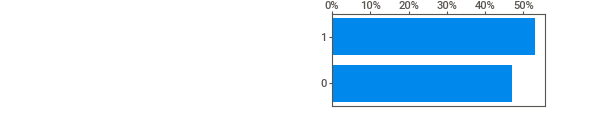
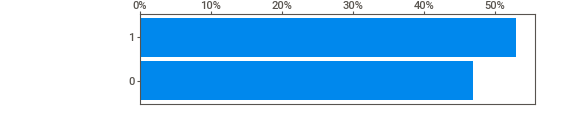
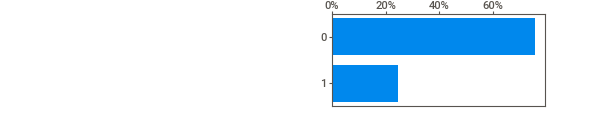
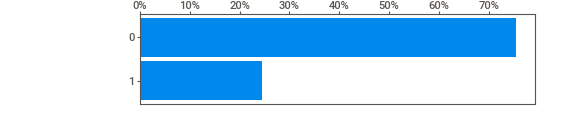
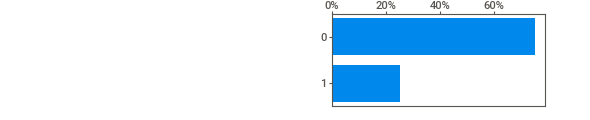
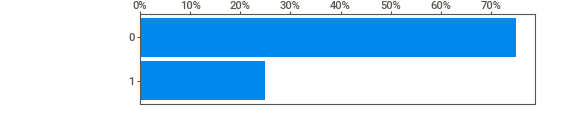
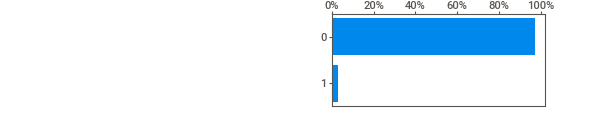
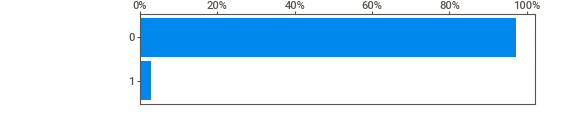
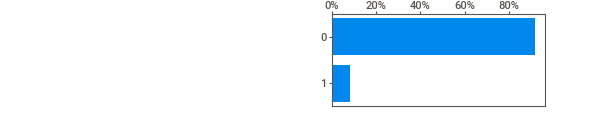
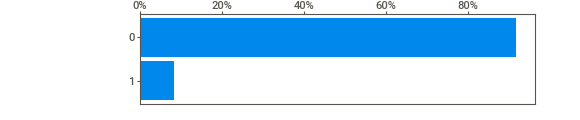
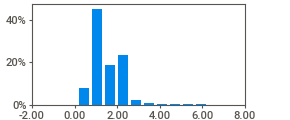
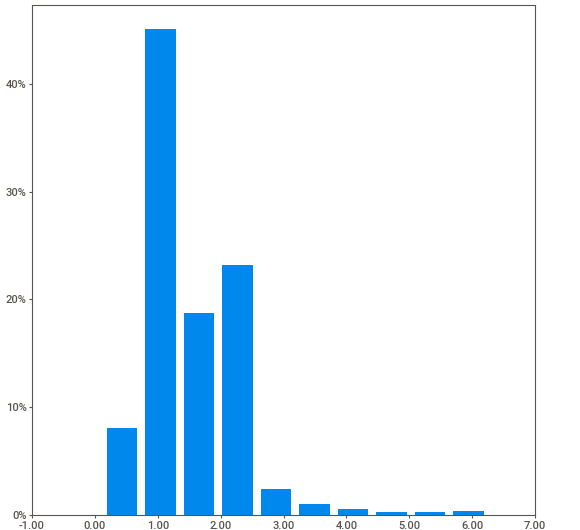
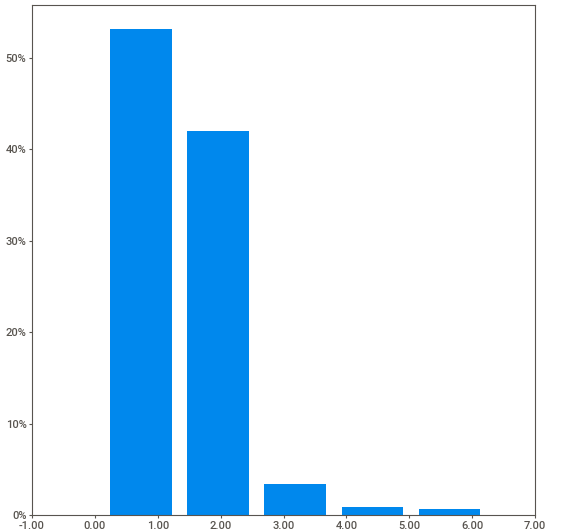
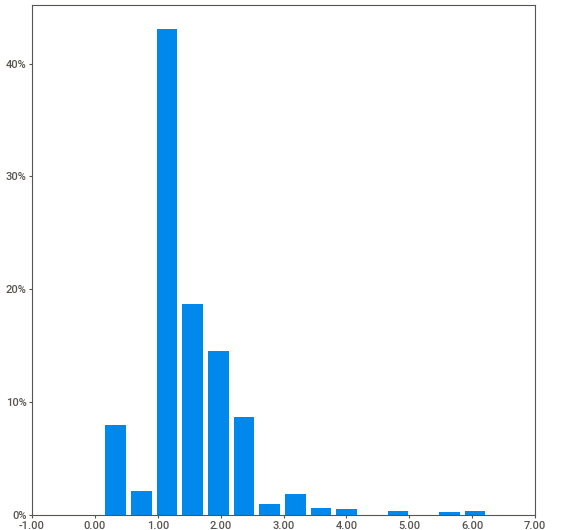
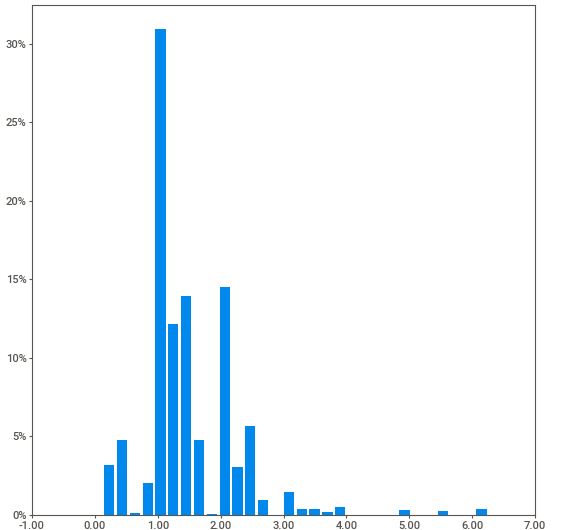
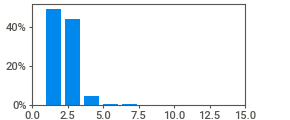
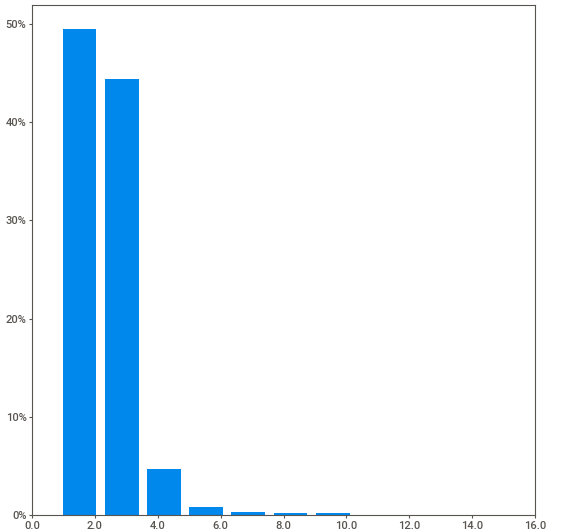
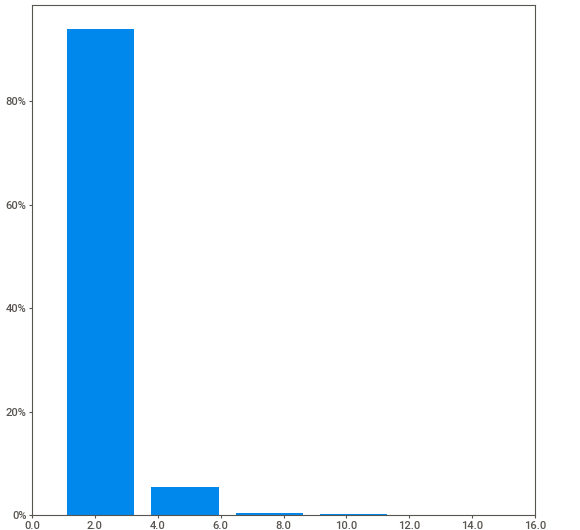
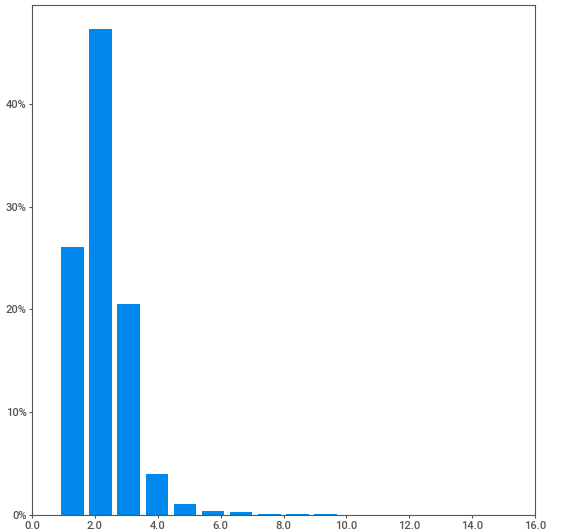
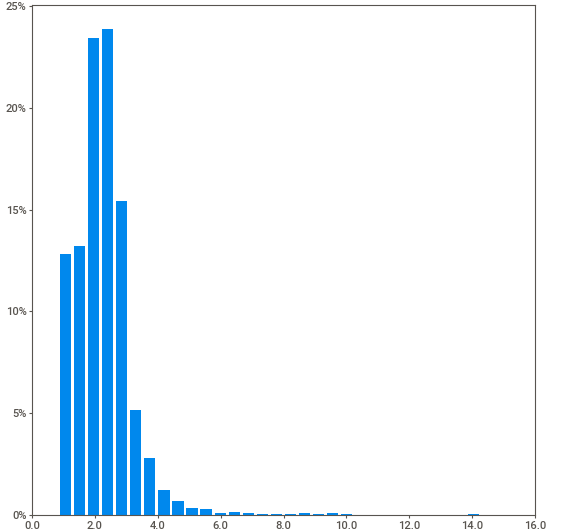
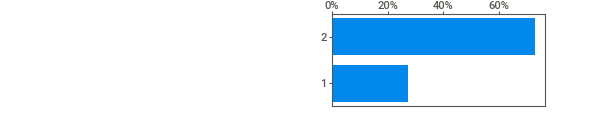
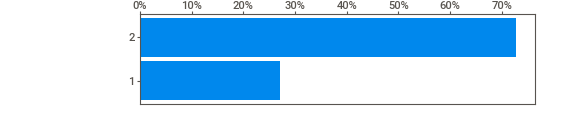
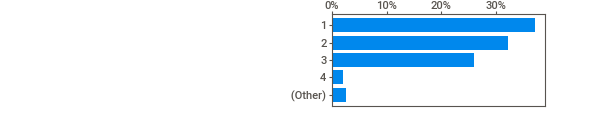
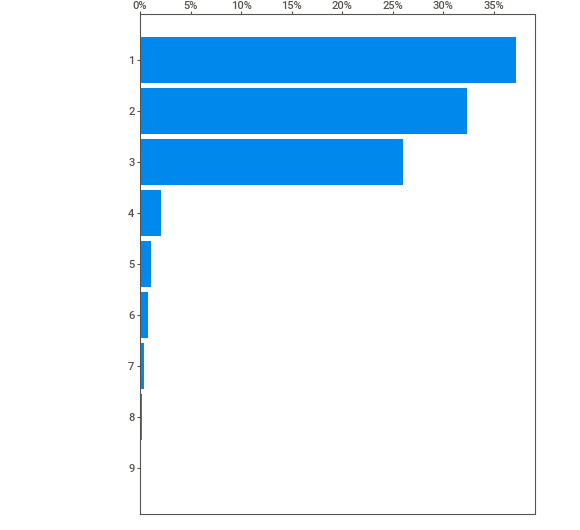
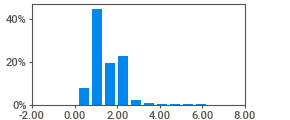
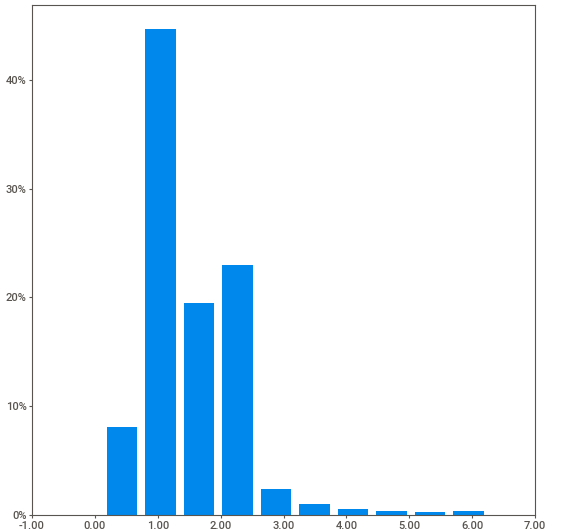
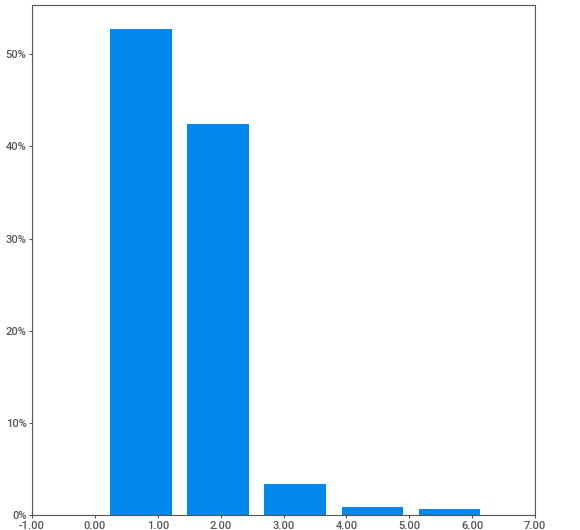
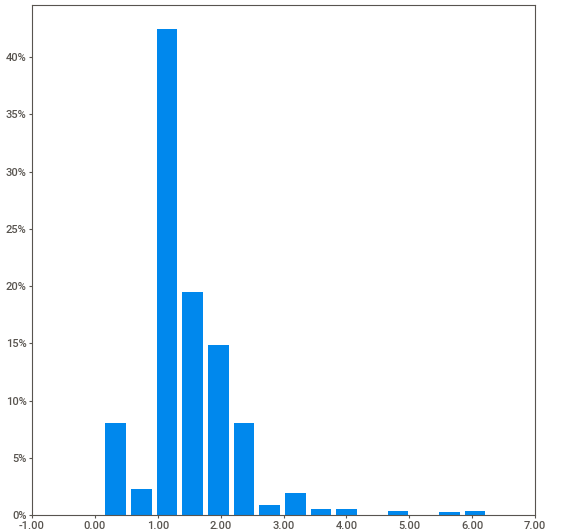
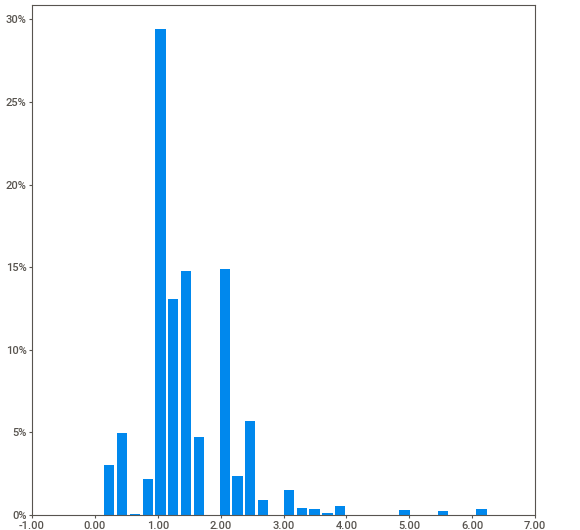
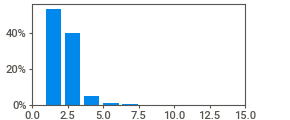
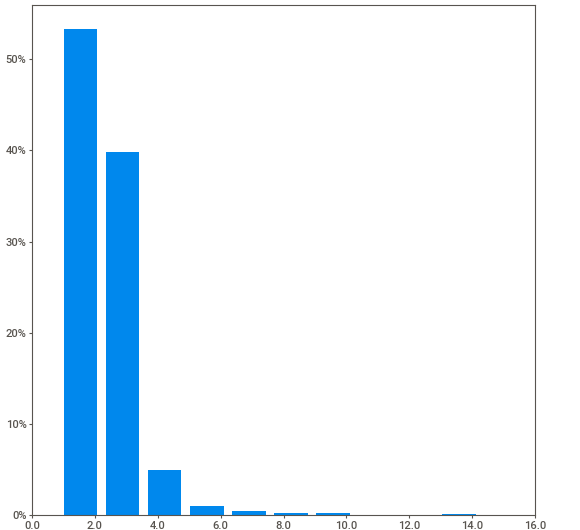
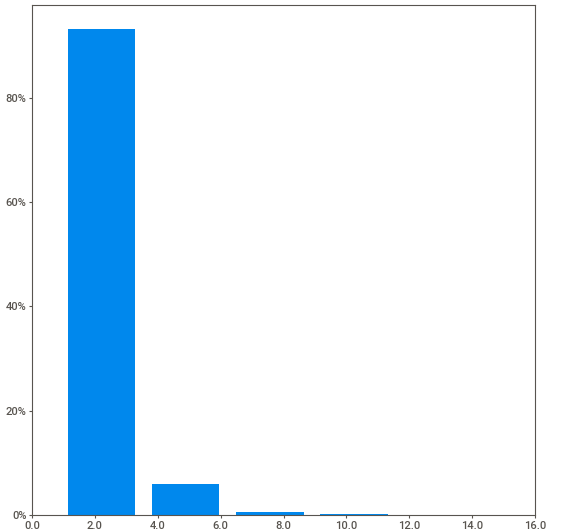
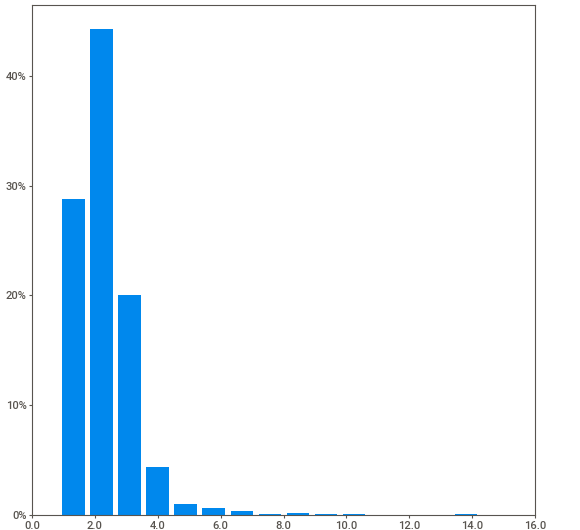
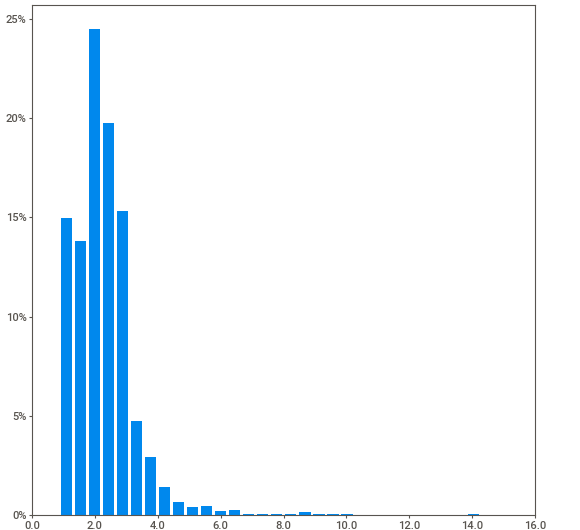
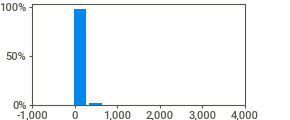
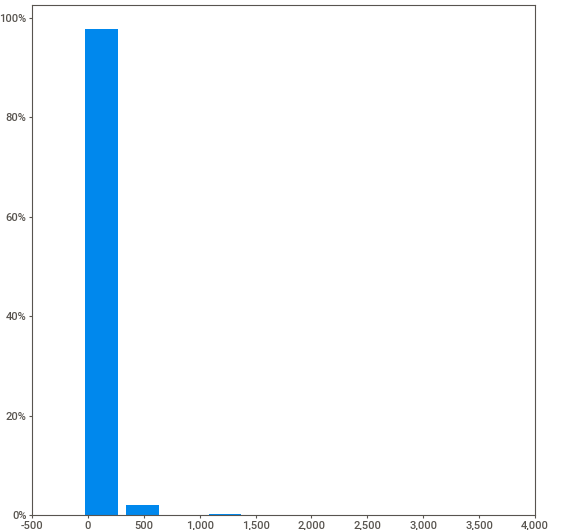
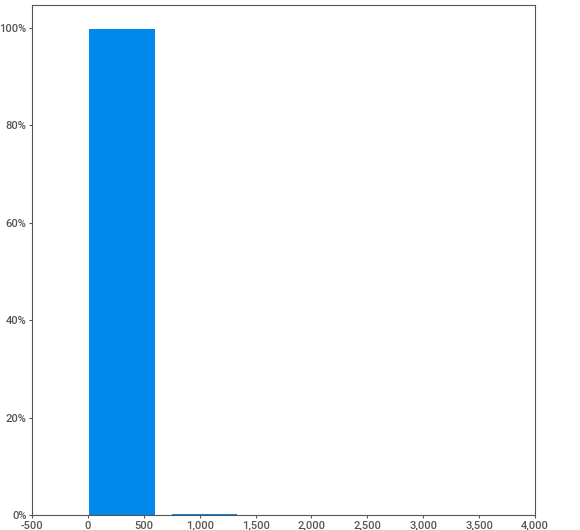
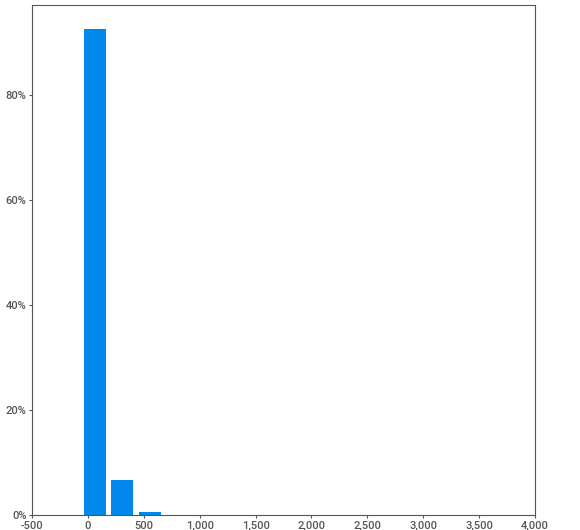
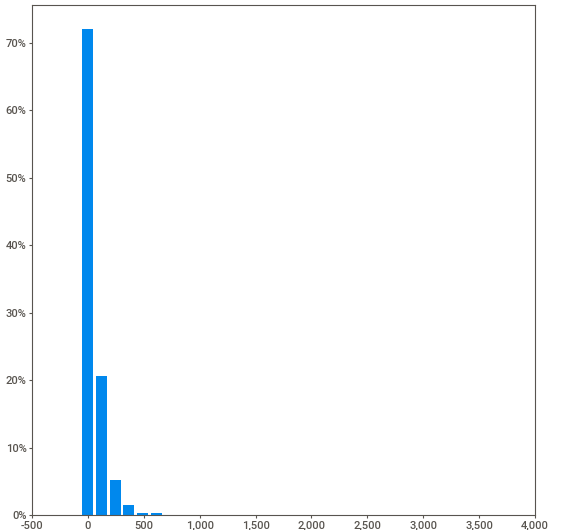
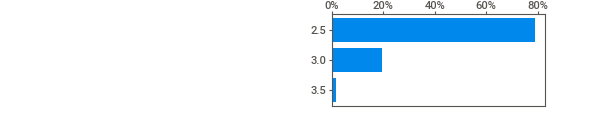
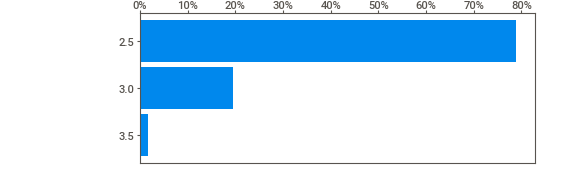
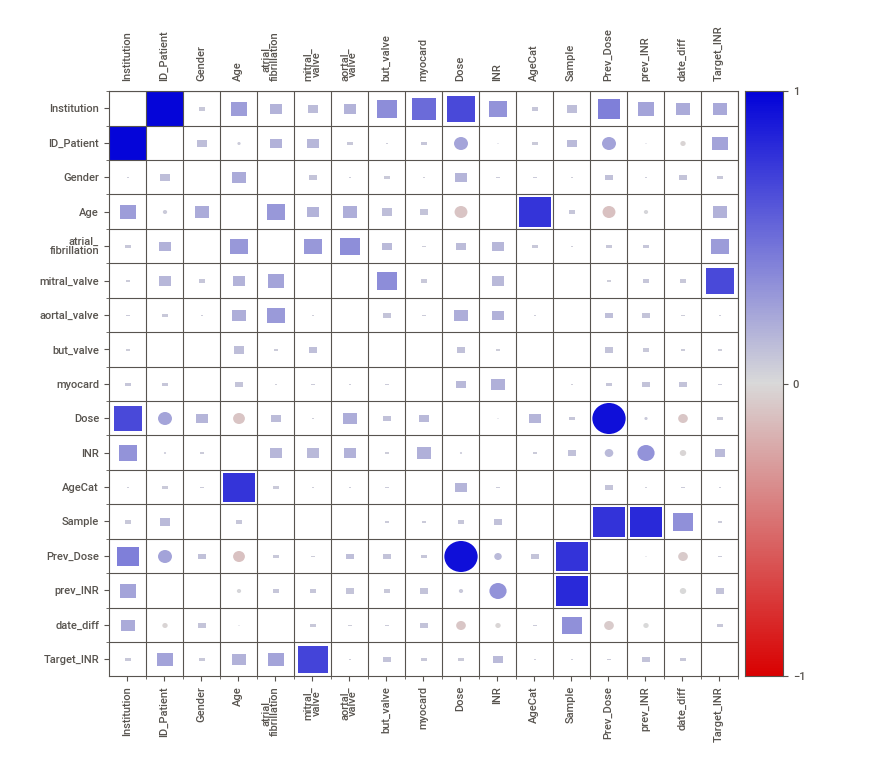
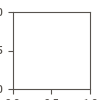

In [48]:
#@title Read File and print info
#PATH = '/content/drive/MyDrive/Warfarin/'
fname = PATH+'TOTALvarfarin.xlsx'
df_src = pd.read_excel(fname)
df_src.rename(columns={
              'МО прикрепления':'Institution',
               'ID пациента':'ID_Patient',
               'Пол':'Gender',
               'Дата рождения':'Birthday',
               'Дата анализа':'Analyse_date',
               'Возраст, полных лет':'Age',
               'Диагноз (врачей)':'Diagnosis',
               'Сердечно -сосудистые события':'cardiovascular',
               'Доза в таблетках':'Dose',
               'МНО':'INR'},
               inplace=True)
#print(df_src.columns)
# Формируем дозы
#if False: '''
dd = list(map(str,df_src['Доза'].unique()))
print(len(dd),type(dd))
for d in sorted(dd):
  print(f'{d}: {len(df_src[df_src.Доза == d])}')
#'''
# Разбираемся с возрастом
if False: '''
def clean_age(age_str,analyse_date):
#  print(type(analyse_date),type(age_str))
  if type(age_str) is str:
    age = re.search(r'\d+',age_str)[0]
#    print(f'Возраст:{age}')
  elif type(analyse_date) is str:
#    print(f'Дата анализа:{analyse_date}')
    age = datetime.now() - age_str
    age = age.days/(365.25)
  else:
    age = analyse_date - age_str
    age = age.days/(365.25)
#    print(age)
  return int(age)

def age_list(count):
  age_l = []
  for i in range(count):
    age_l.append(df_src.Age.quantile(1/(count-i)))
  return np.array(age_l).astype(int)
'''
df_src.sort_values(['ID_Patient','Analyse_date'],inplace =True)
df = df_src.loc[:, ~df_src.columns.isin(FEATURES_DROP)]
df.dropna(inplace = True)

# Правим значения дозы
df.Dose = df.Dose.replace(',','.',regex=True).astype('float')

#Возпаст разбиваем на диапазоны
df =  df[(df.Age > 10)&(df.Age < 95)]
def age_list(count):
  interval = df.Age.count()//count
  age_cnt = df.Age.value_counts().sort_index(ascending=True)
  interval_age = 0
  age_int =[]
  for i,raw in age_cnt.iteritems():
    if (interval_age+raw)< interval:
      interval_age += raw
    else:
      age_int.append(i)
      interval_age = 0
  age_int.append(i)
#  print(age_int)
  return np.array(age_int)
# Правим ошибку в датах
df.Analyse_date[df.Analyse_date =='31.11.2022'] = datetime(2022,11,30)
pearson = []
for i in range(2,len(df.Age.unique())):
  age_l= age_list(i)
 # df[f'AgeCat{i}'] = pd.cut(df.Age,bins=np.concatenate([[0],age_l]),labels=range(1,len(age_l)+1)).astype("category")
#  pearson.append(abs(pearsonr(df.Dose,df[f'AgeCat{i}']).statistic))
#age_cnt = max(enumerate(pearson),key=lambda x: x[1])[0]
#print(age_cnt,'\n',pearson)
#age_l= age_list(AGE_COUNT)
age_l =np.array([df.Age.quantile(.25),df.Age.quantile(1)])
df['AgeCat'] = pd.cut(df_src.Age,bins=np.concatenate([[0],age_l]),labels=range(1,len(age_l)+1)).astype("category")
#print(df[df.AgeCat.isna()].head())
# Пол
df.Gender.replace(['муж','жен'],[0,1],inplace = True)


#добавляем разностные данные
# - период между анализами
# - разница МНО
# - разница в дозах
#df.iterrows()           # пропускаем первую строку
sample =1
df['Sample'] = 1
df['Prev_Dose'] = np.nan
df['prev_INR'] = np.nan
df['date_diff'] = np.nan
for i in range(1,len(df)):
  if df.ID_Patient.iloc[i] == df.ID_Patient.iloc[i-1]:
    sample +=1
    df['Prev_Dose'].iloc[i] = df.Dose.iloc[i-1]
    df['prev_INR'].iloc[i] = df.INR.iloc[i-1]
    df['date_diff'].iloc[i] = (df.Analyse_date.iloc[i]-df.Analyse_date.iloc[i-1]).days
  else:
    sample = 1
  df['Sample'].iloc[i] = sample

#  print(df.ID_Patient.iloc[i],df.ID_Patient.iloc[i-1])
#  print(sample, end=', ')

df['cardiovascular'] = df['cardiovascular'].astype(str)
# -добавляем целевой МНО из инструкции исхдя из диагноза
df['Target_INR'] = 2.5
df.Target_INR[(df.Diagnosis.str.contains('протез',flags=re.IGNORECASE, regex=True) &
              df.Diagnosis.str.contains('аорт', flags=re.IGNORECASE, regex=True)
              |df.cardiovascular.str.contains('протез',flags=re.IGNORECASE, regex=True) &
              df.cardiovascular.str.contains('аорт', flags=re.IGNORECASE, regex=True))&
              (df.Diagnosis.str.contains('ФП', flags=re.IGNORECASE, regex=True)
              |df.Diagnosis.str.contains(' фибрил', flags=re.IGNORECASE, regex=True))
              |df.Diagnosis.str.contains('митр', flags=re.IGNORECASE, regex=True)] =3

df.Target_INR[(df.Diagnosis.str.contains('протез',flags=re.IGNORECASE, regex=True) &
              df.Diagnosis.str.contains('митр', flags=re.IGNORECASE, regex=True)
              |df.cardiovascular.str.contains('протез',flags=re.IGNORECASE, regex=True) &
              df.cardiovascular.str.contains('митр', flags=re.IGNORECASE, regex=True))&
              (df.Diagnosis.str.contains('ФП', flags=re.IGNORECASE, regex=True)
              |df.Diagnosis.str.contains(' фибрил', flags=re.IGNORECASE, regex=True))] =3.5




ar = sw.analyze(df)
ar.show_notebook()
#print(df.head())


In [49]:
'''
t = re.findall('пропуск|\d+[/.,]*\d+','пропуск дозы, уменьшить на 1/2т. 2,5табл.',flags=re.IGNORECASE)
print(t)
if re.search('\d+[/.,]*\d',t):
    t=t.replace(',','.')
    print(eval(t))
else: print(t)
'''

"\nt = re.findall('пропуск|\\d+[/.,]*\\d+','пропуск дозы, уменьшить на 1/2т. 2,5табл.',flags=re.IGNORECASE)\nprint(t)\nif re.search('\\d+[/.,]*\\d',t):\n    t=t.replace(',','.')\n    print(eval(t))\nelse: print(t)\n"

In [50]:
#df.drop(columns=[col for col in df if col not in FEATURES],inplace=True)
df = df[FEATURES]
df.sort_values(['ID_Patient','Sample'],inplace =True)
df.to_excel(PATH+'Warfarin_NN.xlsx',index=False)